<a href="https://colab.research.google.com/github/Vimukthi-Nuwan/Machine_Learning/blob/main/EDA_ML_Practise/Obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.mixture import GaussianMixture
from google.colab import drive

In [2]:
# Create a mount with google drive
drive.mount('/content/mount/')

Drive already mounted at /content/mount/; to attempt to forcibly remount, call drive.mount("/content/mount/", force_remount=True).


In [3]:
# Load the dataset
dataset = pd.read_csv("/content/mount/MyDrive/BCU/CMP7228 Machine Learning/Assignment/Dataset/ObesityDataSet_raw_and_data_sinthetic.csv")

In [4]:
# Inspect the dataset
print("Dataset Info:")
print(dataset.info())
print("Dataset Head:")
print(dataset.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                 

In [5]:
dataset['NObeyesdad'].value_counts()

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


In [6]:
dataset.isin([np.NaN,None]).sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [7]:
# Handle non-numeric or invalid values
dataset['Height'] = pd.to_numeric(dataset['Height'], errors='coerce')
dataset['Weight'] = pd.to_numeric(dataset['Weight'], errors='coerce')

In [8]:
# Drop rows with NaN in key columns
dataset = dataset.dropna(subset=['Height', 'Weight'])

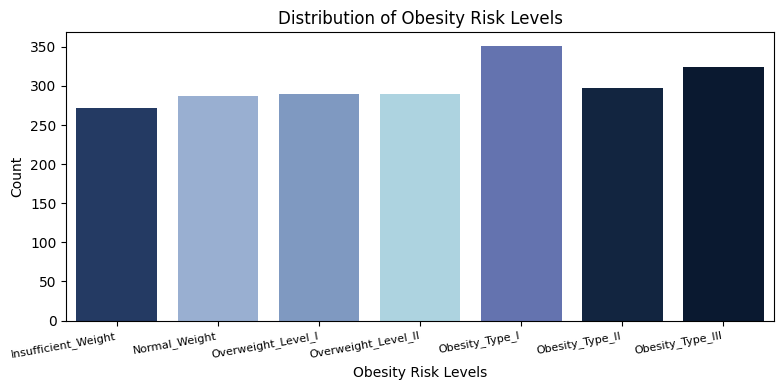

In [9]:
# Exploratory Data Analysis (EDA)
# Distribution of Obesity Risk Levels

color_list = ["#8faddb", "#7497cc", "#A5D7E8", "#576CBC", "#19376D", "#0B2447", "#041836"]

cmap_custom = ListedColormap(color_list)

sorted_labels = [
    'Insufficient_Weight', 'Normal_Weight',
    'Overweight_Level_I', 'Overweight_Level_II',
    'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'
]
obesity = dataset.iloc[:, -1]
plt.figure(figsize=(8, 4))
ax = sns.countplot(
    x = obesity,
    hue = obesity,
    order = sorted_labels,
    palette = color_list
)

ax.set_xticks(range(len(sorted_labels)))
ax.set_xticklabels(sorted_labels, rotation=10, ha='right', fontsize=8)

plt.title('Distribution of Obesity Risk Levels')
plt.xlabel('Obesity Risk Levels')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

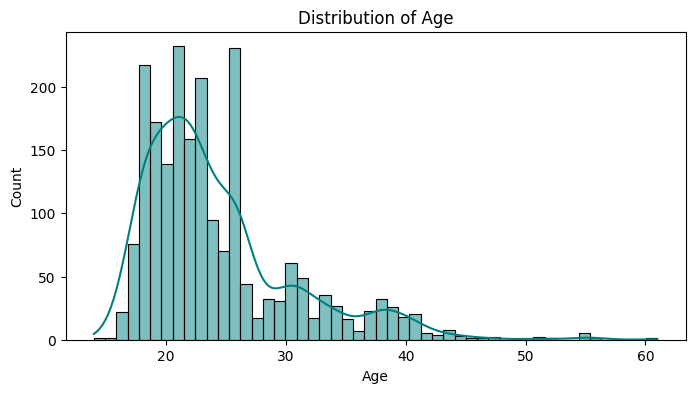

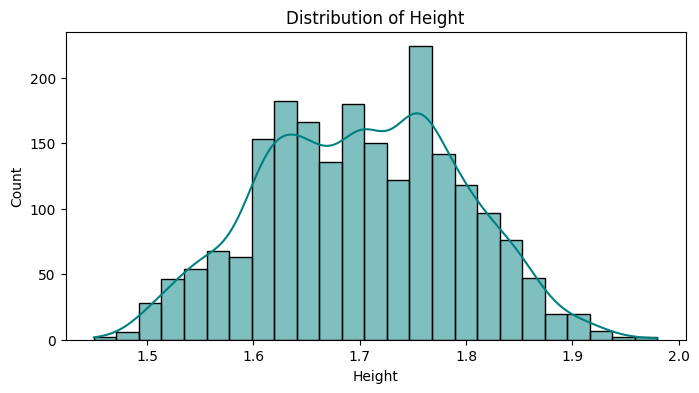

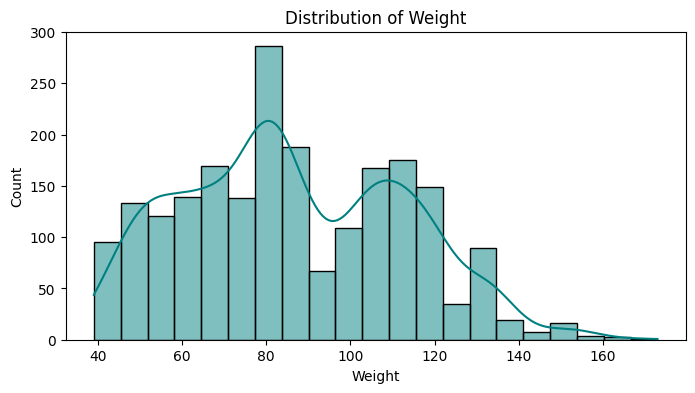

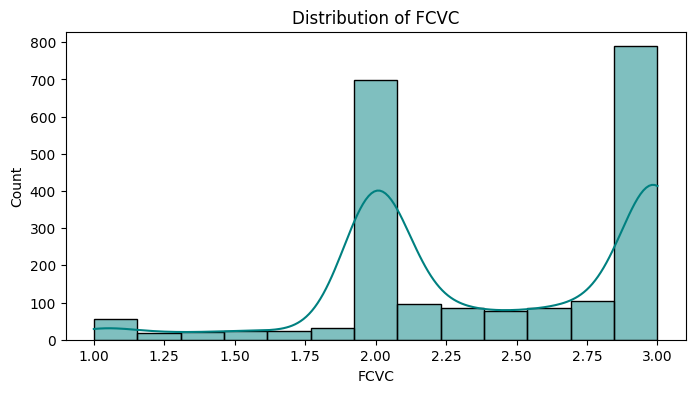

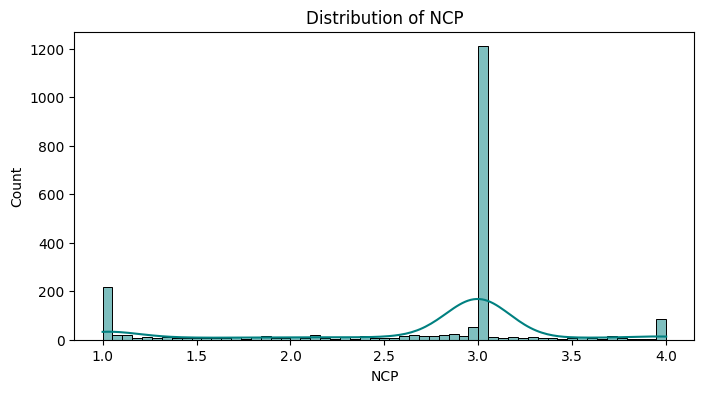

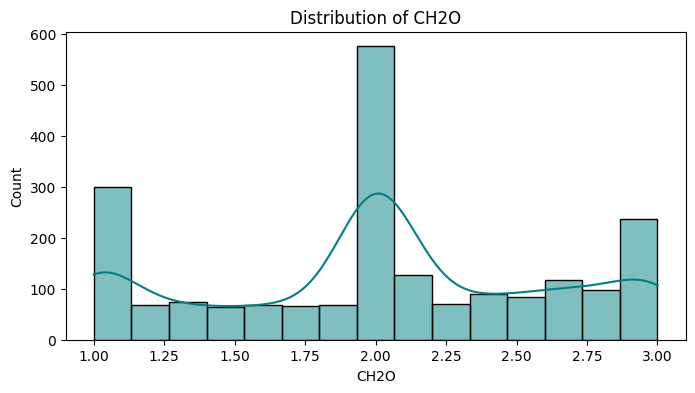

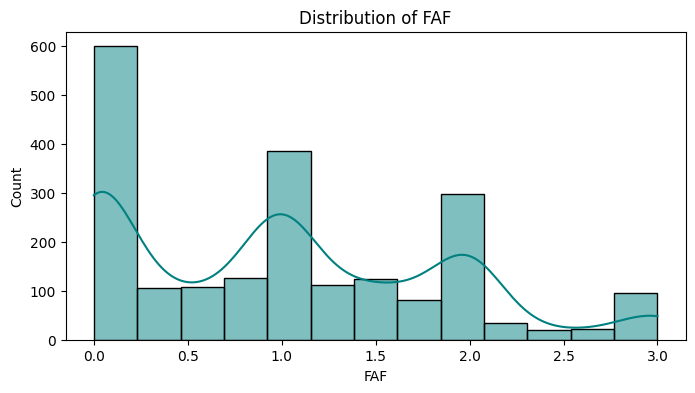

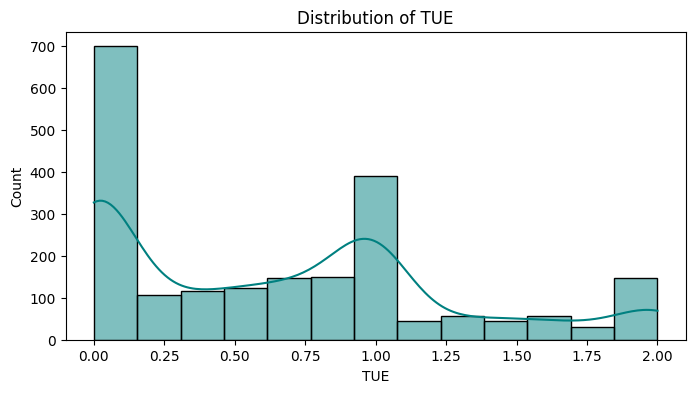

In [10]:
# Plot distributions of numerical features
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset[col], kde=True, color='Teal')
    plt.title(f"Distribution of {col}")
    plt.show()

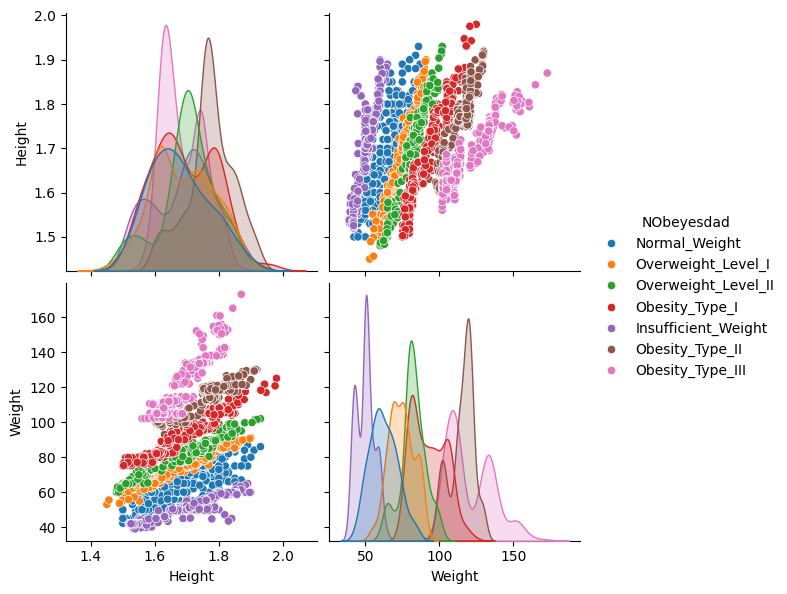

In [11]:
# Pairplot for Height, Weight, and Target variable
sns.pairplot(dataset[['Height', 'Weight', 'NObeyesdad']], hue='NObeyesdad', diag_kind='kde', height=3)
plt.show()

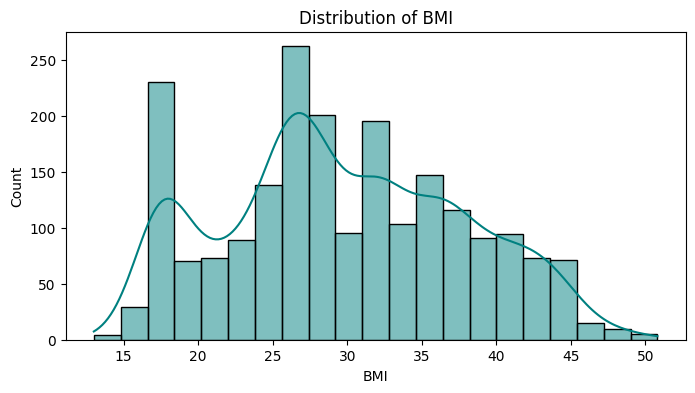

In [12]:
# Plot distribution for BMI values
dataset['BMI'] = dataset['Weight'] / (dataset['Height'] ** 2)
plt.figure(figsize=(8, 4))
sns.histplot(dataset['BMI'], kde=True, color='Teal')
plt.title(f"Distribution of BMI")
plt.show()


In [13]:
# Divide as a categorical and numenrical features
numeric_features = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = dataset.select_dtypes(include=['object']).columns.tolist()

In [14]:
# Encoding categorical features using LabelEncoder
encoder = LabelEncoder()
for feature in categorical_features:
  dataset[feature] = encoder.fit_transform(dataset[feature])

In [15]:
print("Dataset Info:")
print(dataset.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                 

## Supervised Learning

In [16]:
# Dividing dataset
X = dataset.drop(columns = ['NObeyesdad'])
y = dataset['NObeyesdad']

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Feature Scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [19]:
# SVM with RBF Kernel
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train_scaled, y_train)
svm_predictions = svm.predict(X_test_scaled)
print("SVM Model Accuracy:", accuracy_score(y_test, svm_predictions))
svm_classi_report = classification_report(y_test, svm_predictions, target_names=sorted_labels, output_dict=True)

SVM Model Accuracy: 0.9219858156028369


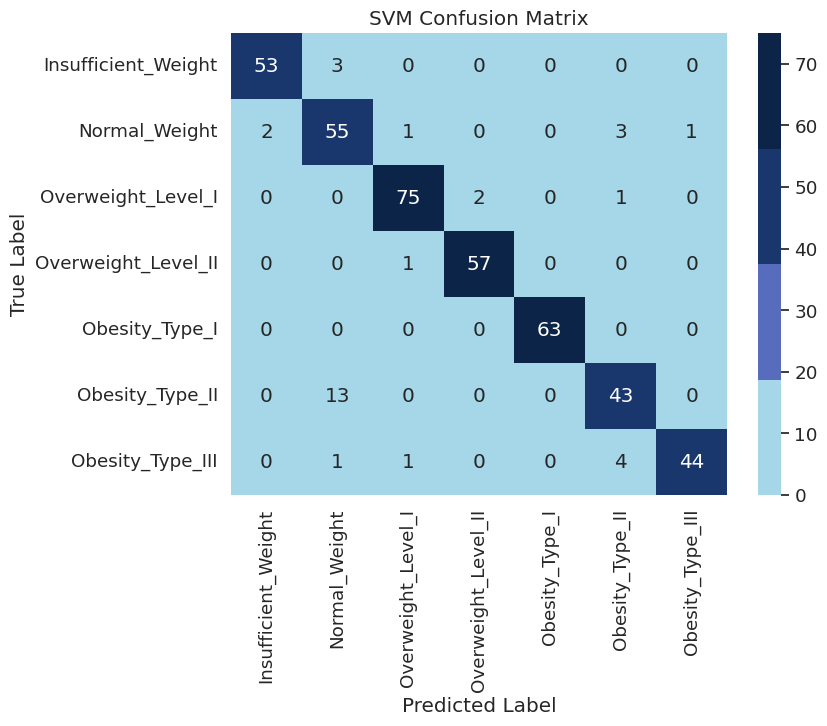

In [20]:
color_list = ["#A5D7E8", "#576CBC", "#19376D", "#0B2447"]
cmap_custom = ListedColormap(color_list)

svm_conf_matrix = confusion_matrix(y_true=y_test, y_pred=svm_predictions)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

sns.heatmap(
    svm_conf_matrix,
    annot=True,
    fmt='d',
    cmap=cmap_custom,
    xticklabels=sorted_labels,
    yticklabels=sorted_labels
)
plt.title("SVM Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [21]:
# Train a Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train)
gb_predictions = gb.predict(X_test_scaled)
print("Gradient Boost Model Accuracy:", accuracy_score(y_test, gb_predictions))
gb_classi_report = classification_report(y_test, gb_predictions, target_names= sorted_labels, output_dict=True)

Gradient Boost Model Accuracy: 0.9763593380614657


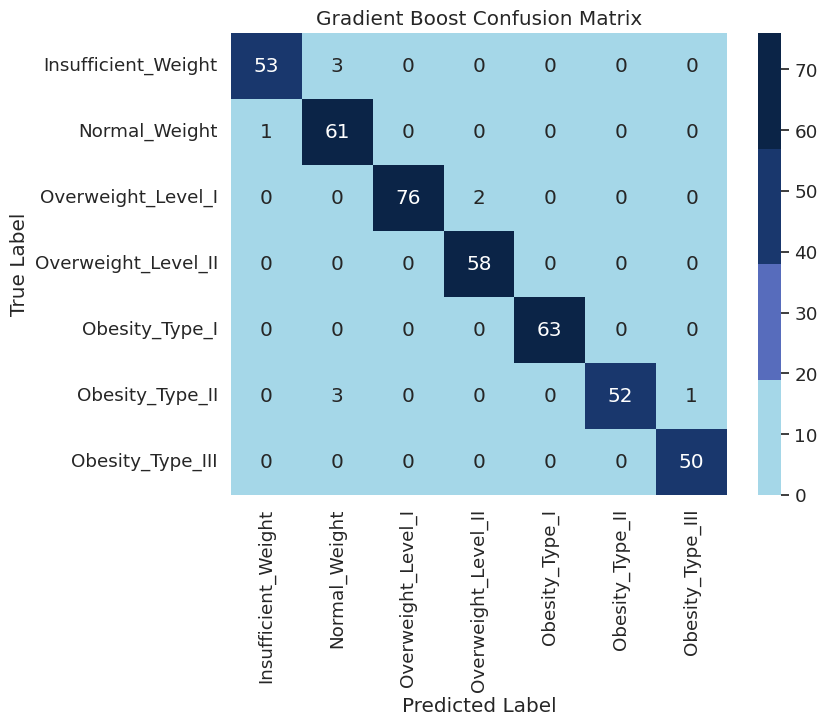

In [22]:
gb_conf_matrix = confusion_matrix(y_true=y_test, y_pred=gb_predictions)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

sns.heatmap(
    gb_conf_matrix,
    annot=True,
    fmt='d',
    cmap=cmap_custom,
    xticklabels=sorted_labels,
    yticklabels=sorted_labels
)
plt.title('Gradient Boost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [23]:
# XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)
xgb_predictions = xgb.predict(X_test_scaled)
print("XGBoost Model Accuracy:", accuracy_score(y_test, xgb_predictions))
xgb_classi_report = classification_report(y_test, xgb_predictions, target_names=sorted_labels, output_dict=True)

XGBoost Model Accuracy: 0.9881796690307328


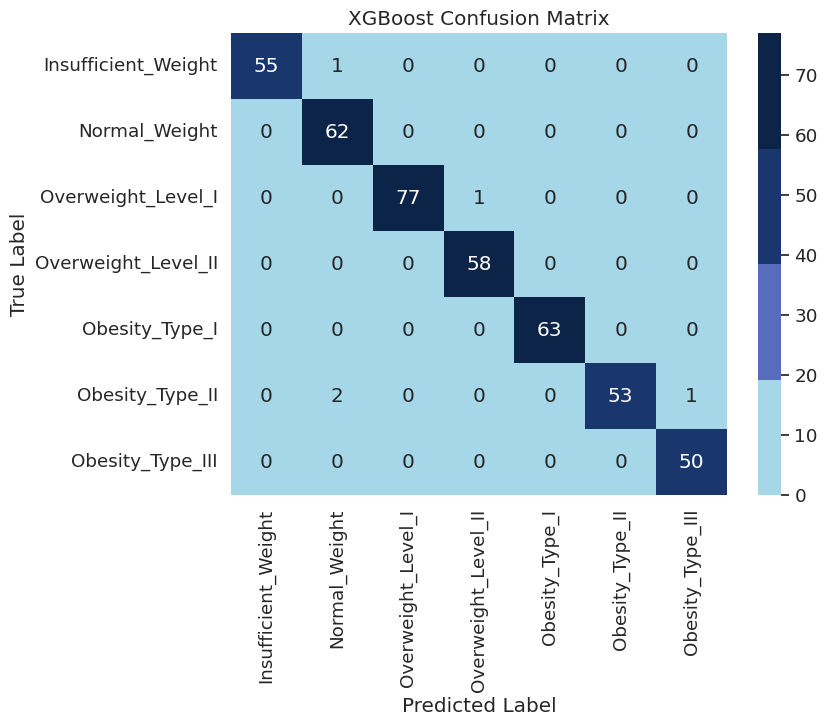

In [24]:
xgb_conf_matrix = confusion_matrix(y_true=y_test, y_pred=xgb_predictions)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

sns.heatmap(
    xgb_conf_matrix,
    annot=True,
    fmt='d',
    cmap=cmap_custom,
    xticklabels=sorted_labels,
    yticklabels=sorted_labels
)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
# Classification report for all supervised models
svm_df = pd.DataFrame(svm_classi_report).transpose()
gb_df = pd.DataFrame(gb_classi_report).transpose()
xgb_df = pd.DataFrame(xgb_classi_report).transpose()

svm_metrics = svm_df[['precision', 'recall', 'f1-score']]
gb_metrics = gb_df[['precision', 'recall', 'f1-score']]
xgb_metrics = xgb_df[['precision', 'recall', 'f1-score']]

svm_metrics = svm_metrics.rename(columns={'precision': 'SVM Precision', 'recall': 'SVM Recall', 'f1-score': 'SVM F1-Score'})
gb_metrics = gb_metrics.rename(columns={'precision': 'GB Precision', 'recall': 'GB Recall', 'f1-score': 'GB F1-Score'})
xgb_metrics = xgb_metrics.rename(columns={'precision': 'XGB Precision', 'recall': 'XGB Recall', 'f1-score': 'XGB F1-Score'})

combined_report = pd.concat([svm_metrics, gb_metrics, xgb_metrics], axis=1)

desired_columns = [
    'SVM Precision', 'GB Precision', 'XGB Precision',
    'SVM Recall', 'GB Recall', 'XGB Recall',
    'SVM F1-Score', 'GB F1-Score', 'XGB F1-Score'
]

combined_report = combined_report[desired_columns]

combined_report = combined_report.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white')]}]
).set_properties(**{'border': '1px solid black', 'text-align': 'center'})

combined_report


,SVM Precision,GB Precision,XGB Precision,SVM Recall,GB Recall,XGB Recall,SVM F1-Score,GB F1-Score,XGB F1-Score
Insufficient_Weight,0.963636,0.981481,1.000000,0.946429,0.946429,0.982143,0.954955,0.963636,0.990991
Normal_Weight,0.763889,0.910448,0.953846,0.887097,0.983871,1.000000,0.820896,0.945736,0.976378
Overweight_Level_I,0.961538,1.000000,1.000000,0.961538,0.974359,0.987179,0.961538,0.987013,0.993548
Overweight_Level_II,0.966102,0.966667,0.983051,0.982759,1.000000,1.000000,0.974359,0.983051,0.991453
Obesity_Type_I,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Obesity_Type_II,0.843137,1.000000,1.000000,0.767857,0.928571,0.946429,0.803738,0.962963,0.972477
Obesity_Type_III,0.977778,0.980392,0.980392,0.880000,1.000000,1.000000,0.926316,0.990099,0.990099
accuracy,0.921986,0.976359,0.988180,0.921986,0.976359,0.988180,0.921986,0.976359,0.988180
macro avg,0.925154,0.976998,0.988184,0.917954,0.976176,0.987964,0.920257,0.976071,0.987849
weighted avg,0.925445,0.977534,0.988593,0.921986,0.976359,0.988180,0.922485,0.976440,0.988169


In [26]:
# Isolation Forest (for Anomaly Detection)
isolation_forest = IsolationForest(random_state=42)
isolation_forest.fit(X_train_scaled)
anomaly_scores = isolation_forest.decision_function(X_test_scaled)

In [27]:
# Evaluate Isolation Forest (Anomaly Detection)
print("\nIsolation Forest Anomaly Detection Scores (Sample):")
print(anomaly_scores[:10])


Isolation Forest Anomaly Detection Scores (Sample):
[-0.03910974  0.10432448 -0.05506975 -0.02092089  0.0148253   0.04922657
  0.10492321  0.06475528  0.05803195  0.01202107]


In [28]:
# Compute ROC-AUC Score for multiclass
y_test_binarized = label_binarize(y_test, classes=np.unique(y))

svm_probabilities = svm.predict_proba(X_test_scaled)

gb_probabilities = gb.predict_proba(X_test_scaled)

xgb_probabilities = xgb.predict_proba(X_test_scaled)

roc_auc = roc_auc_score(y_test_binarized, svm_probabilities, multi_class='ovr')
print("SVM ROC-AUC Score (Multiclass):", roc_auc)

roc_auc = roc_auc_score(y_test_binarized, gb_probabilities, multi_class='ovr')
print("\nGradient Boost ROC-AUC Score (Multiclass):", roc_auc)

roc_auc = roc_auc_score(y_test_binarized, xgb_probabilities, multi_class='ovr')
print("\nXGBoost ROC-AUC Score (Multiclass):", roc_auc)

SVM ROC-AUC Score (Multiclass): 0.9933808535148803

Gradient Boost ROC-AUC Score (Multiclass): 0.9992181210838166

XGBoost ROC-AUC Score (Multiclass): 0.9998966151026816


## Clustering Analysis

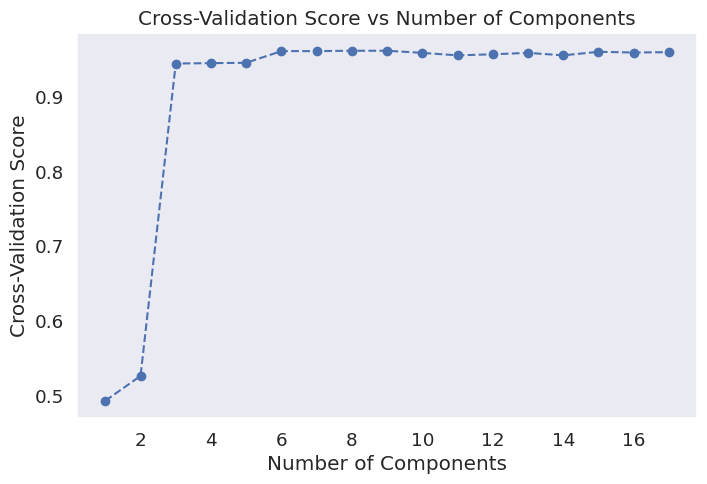

In [29]:
# Test PCA for various n_components
scores = []
components_range = range(1, X.shape[1] + 1)

for n in components_range:
    pca = PCA(n_components=n)
    df_reduced = pca.fit_transform(X)

    model = LogisticRegression(max_iter=5000)
    score = cross_val_score(model, df_reduced, y, cv=5, scoring='accuracy').mean()
    scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(components_range, scores, marker='o', linestyle='--')
plt.title('Cross-Validation Score vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cross-Validation Score')
plt.grid()
plt.show()


In [30]:
# Use PCA for dimensionality reduction and visualize clusters
pca = PCA(n_components=3, random_state = 42)
reduced_features = pca.fit_transform(X)
pca_dataset = pd.DataFrame(reduced_features, columns=['PCA_01', 'PCA_02', 'PCA_03'])
pca_dataset['NObeyesdad'] = y

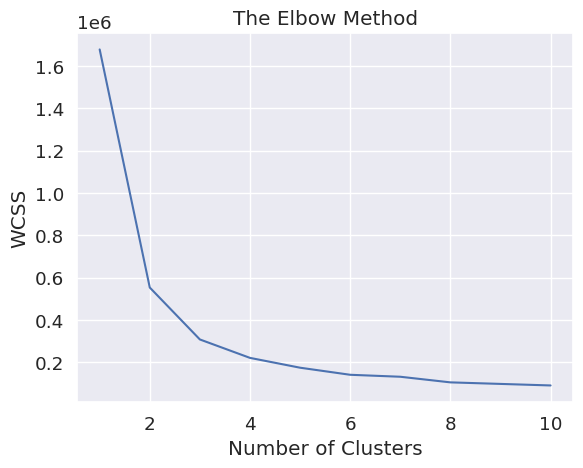

In [31]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42).fit(pca_dataset)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_dataset)
score = silhouette_score(pca_dataset, clusters)
score

0.5050564012649823

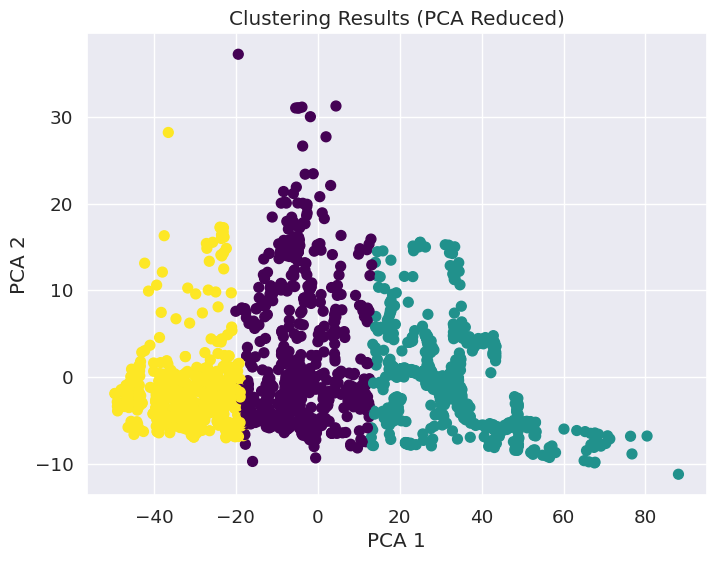

In [33]:
# Plot clustering results
plt.figure(figsize=(8, 6))
plt.scatter(pca_dataset.iloc[:, 0], pca_dataset.iloc[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Clustering Results (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [34]:
# Apply Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_clusters = gmm.fit_predict(pca_dataset)
score = silhouette_score(pca_dataset, gmm_clusters)
score

0.32134971571672705

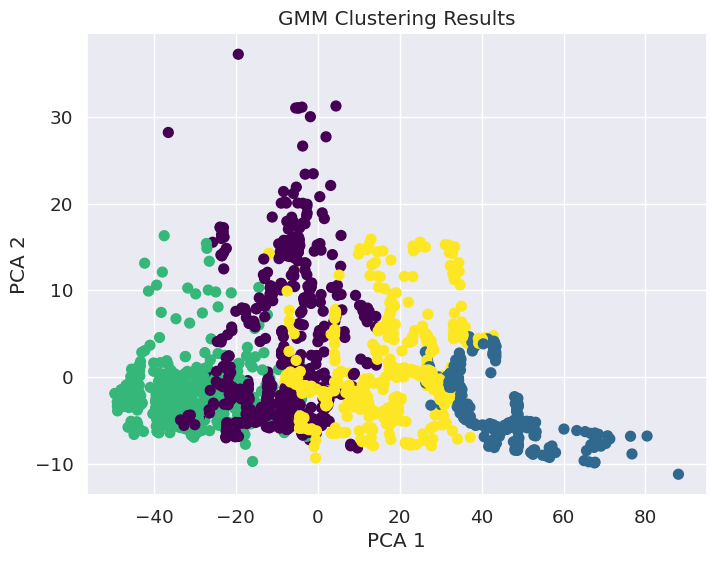

In [35]:
# Plot GMM Clustering
plt.figure(figsize=(8, 6))
plt.scatter(pca_dataset.iloc[:, 0], pca_dataset.iloc[:, 1], c=gmm_clusters, cmap='viridis', s=50)
plt.title("GMM Clustering Results")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [36]:
eps_values = np.arange(0.1, 1.0, 0.1)  # Test a range of eps values
min_samples_values = range(3, 10)

best_score = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(pca_dataset)

        # Exclude cases with a single cluster or no clusters
        if len(set(labels)) > 1 and np.any(labels != -1):
            score = silhouette_score(pca_dataset, labels)
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

if best_params is not None:
    print(f"Best params: eps={best_params[0]}, min_samples={best_params[1]}, silhouette score={best_score}")
else:
    print("No valid DBSCAN configuration found.")


Best params: eps=0.9, min_samples=3, silhouette score=-0.00516110369252255


In [37]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples = 3)
dbscan_clusters = dbscan.fit_predict(reduced_features)
score = silhouette_score(reduced_features, dbscan_clusters)
score

-0.012275552226100972

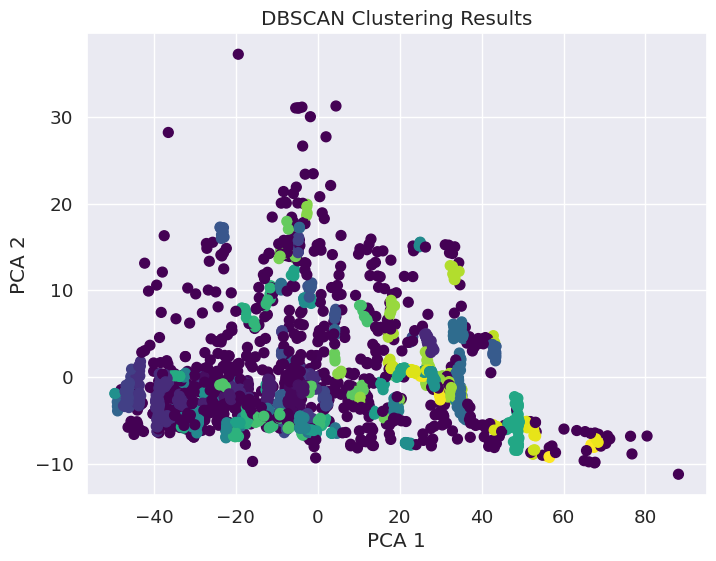

In [38]:
# Plot DBSCAN Clustering
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=dbscan_clusters, cmap='viridis', s=50)
plt.title("DBSCAN Clustering Results")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()